In [1]:
from typing import Tuple, Any, Dict

import pandas as pd
from pandas import Series, DataFrame

raw_dataset_path = "../dataset/raw"
from os.path import join as join_pth
import matplotlib.pyplot as plt
import random
from IPython.core.display import HTML
import seaborn as sns
# % matplotlib inline
sns.set_style('whitegrid')

In [2]:

# styles = open("./rossman-style.css", "r").read()
# styles = f"<style>\n{styles}\n<\style>"
# HTML(styles)


In [148]:
def pie_chart(ax, values, labels, title,space_width=3,startangle=90):
    patches, texts, pcts = ax.pie(
        values, labels=labels, autopct='%.1f%%',
        wedgeprops={'linewidth': space_width, 'edgecolor': 'white'},
        textprops={'size': 'large'},
        startangle=startangle)
    # For each wedge, set the corresponding text label color to the wedge's
    # face color.
    for i, patch in enumerate(patches):
      texts[i].set_color(patch.get_facecolor())
    plt.setp(pcts, color='white')
    plt.setp(texts, fontweight=600)
    ax.set_title(title, fontsize=18)
    plt.tight_layout()

# introduction

<p align="center"><img src="./assets/rosman.jpg" height="350"  alt="rosman"/></p>>


- Rossmann, is one of the largest drug store chains in Europe with around 56,200 employees and more than 4000 stores  in Germany, Poland, Hungary, the Czech Republic, Turkey, Albania, Kosovo and Spain.
- The product range includes up to 21,700 items and can vary depending on the size of the shop and the location. In addition to drugstore goods with a focus on skin, hair, body, baby and health
- The company was founded in 1972 by Dirk Rossmann , The Rossmann family owns 60% of the company. The Hong Kong-based A.S. Watson Group owns 40%


## Roadmap
1. loading data and handling null values , check datatypes
2. Data analysis
3. feature engineering
4. create prediction model
5. model training
6. hyperparameters tuning
7. model evaluation

## Data fields


<br><br>

- Id - an Id that represents a (Store, Date) duple within the test set
- Store - a unique Id for each store
- Sales - the turnover for any given day (this is what you are predicting)
- Date --> Date of the current day in the sales
- DayOfWeek (int) day of the week in numbers where 1:monday ,2:tuesday ... 7:sunday
- Customers - the number of customers on a given day
- Open - an indicator for whether the store was open: 0 = closed, 1 = open
- StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends.
    - a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
- StoreType - differentiates between 4 different store models: a, b, c, d
- Assortment - describes an assortment level: a = basic, b = extra, c = extended
    - An assortment strategy is a retail industry sales tool that optimizes the variety of goods offered for sale to consumers
- CompetitionDistance - distance in meters to the nearest competitor store
- CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
- Promo - indicates whether a store is running a promo on that day
- Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
- PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# Data Loading
- load the data
- view missing values
- check data types


In [4]:
stores_df = pd.read_csv(join_pth(raw_dataset_path, "store.csv"), low_memory=False)
stores_sales_df = pd.read_csv(join_pth(raw_dataset_path, "train.csv"), low_memory=False)


In [5]:
stores_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
stores_sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
stores_sales_df.info()
print("------------------------------")
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115

<p style="font-size:25;font-weight:bold">Change columns type</p>

In [167]:
stores_sales_df['Date'] = pd.to_datetime(stores_sales_df['Date'])

sales_category_cols = ["Promo", "Open", "StateHoliday", "SchoolHoliday", "DayOfWeek"]
stores_category_cols = ["StoreType", "Assortment", "Promo2"]

for col_name in sales_category_cols:
    stores_sales_df[col_name] = stores_sales_df[col_name].astype("category")

for col_name in stores_category_cols:
    stores_df[col_name] = stores_df[col_name].astype("category")

merged_stores_sales = stores_sales_df.merge(stores_df, on='Store')



In [9]:
stores_sales_df.info()
print("------------------------------")
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  category      
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  category      
 6   Promo          1017209 non-null  category      
 7   StateHoliday   1017209 non-null  category      
 8   SchoolHoliday  1017209 non-null  category      
dtypes: category(5), datetime64[ns](1), int64(3)
memory usage: 35.9 MB
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     -------

In [10]:
print(f"StateHoliday Values{stores_sales_df.StateHoliday.unique()} , Data type -> {stores_sales_df.StateHoliday.dtype}")

StateHoliday Values['0', 'a', 'b', 'c']
Categories (4, object): ['0', 'a', 'b', 'c'] , Data type -> category


In [11]:
print(f"DayOfWeek values{stores_sales_df.DayOfWeek.unique()} , Data type -> {stores_sales_df.DayOfWeek.dtype}")

DayOfWeek values[5, 4, 3, 2, 1, 7, 6]
Categories (7, int64): [1, 2, 3, 4, 5, 6, 7] , Data type -> category


In [12]:
stores_sales_df[stores_sales_df.SchoolHoliday == 1].DayOfWeek.unique()

[5, 4, 3, 2, 1, 7, 6]
Categories (7, int64): [1, 2, 3, 4, 5, 6, 7]

CompetitionOpenSinceMonth , CompetitionOpenSinceYear

In [13]:
compYear_comp_month_null = stores_df[(stores_df.iloc[:, 4].isnull()) & (stores_df.iloc[:, 5].isnull())]
print((stores_df.iloc[:, 4].isnull()).count() == (stores_df.iloc[:, 5].isnull()).count())
print(
    f"both CompetitionOpenSinceYear and CompetitionOpenSinceMonth both null count {compYear_comp_month_null.count()[0]}")

True
both CompetitionOpenSinceYear and CompetitionOpenSinceMonth both null count 354


# 1- Data preprocessing , Feature engineering
- check and handle missing values
    - CompetitionDistance
    - Promo2SinceWeek ,  Promo2SinceYear ,PromoInterval
        - check if no of stores that have promo2 = 0  equal number of  null values in this columns
    - CompetitionOpenSinceMonth , CompetitionOpenSinceYear


In [14]:
stores_df_prep_df = stores_df.copy(deep=True)
stores_sales_prep_df = stores_sales_df.copy(deep=True)

<p style="font-size:25;font-weight:bold">Stores Sales </p>

- no null values
<p style="font-size:25;font-weight:bold">Stores data </p>

- some null values exists we have 1115 stores
- if promo2=0 then the store has no promo months then Promo2SinceWeek,Promo2SinceYear,PromoInterval will be equal null, so we will set the promo2=0 rows Promo2SinceWeek=0 Promo2SinceYear=0 , promo2Interval=0
- for Competitor data null values we will assume that there is no competitors near the store

## 1.1 Check and handle missing values

### 1.1.1 Competition Distance

In [15]:
stores_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,50.000000,2015.000000


In [16]:
stores_sales_sum = stores_sales_df[['Store', 'Customers']].groupby(by='Store').sum()
stores_sales_sum = stores_sales_sum.merge(stores_df, on='Store')
## select same type for stores in Assortment type and store type

stores_sales_sum = stores_sales_sum[(stores_sales_sum['Assortment'] == 'a') & (stores_sales_sum['StoreType'] == 'a')]
stores_sales_sum = stores_sales_sum.sort_values(by="CompetitionDistance")

stores_sales_sum = pd.DataFrame(stores_sales_sum)

In [17]:
stores_sales_sum.sample()

,Store,Customers,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1039,1040,674734,a,a,4030.0,2.0,2013.0,1,10.0,2014.0,"Jan,Apr,Jul,Oct"


In [18]:
stores_sales_sum.corr()['Customers']

Store                        0.041872
Customers                    1.000000
CompetitionDistance         -0.187939
CompetitionOpenSinceMonth   -0.066772
CompetitionOpenSinceYear     0.056117
Promo2SinceWeek             -0.159582
Promo2SinceYear             -0.009873
Name: Customers, dtype: float64

<p style="font-size:25;font-weight:bold">Based on section 1.1.1</p>

- there is an inverse correlation relation between no of customers and Competition Distance
- so we will fill null values with the least amount that affect the sales which is the max distance

In [19]:
# fill null with max
stores_df['CompetitionDistance'] = stores_df['CompetitionDistance'].fillna(stores_df['CompetitionDistance'].max())

- CompetitionOpenSinceYear and CompetitionOpenSinceMonth null values are for the same rows

### 1.1.2 Promo2 SinceWeek,SinceYear,PromoInterval

In [20]:
non_promo_stores = stores_df[(stores_df['Promo2'] == 0)][
    ['Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval']]
non_promo_stores.sample(10)

,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval
873,0,NaN,NaN,NaN
949,0,NaN,NaN,NaN
678,0,NaN,NaN,NaN
137,0,NaN,NaN,NaN
645,0,NaN,NaN,NaN
244,0,NaN,NaN,NaN
593,0,NaN,NaN,NaN
626,0,NaN,NaN,NaN
979,0,NaN,NaN,NaN
84,0,NaN,NaN,NaN


In [21]:
non_promo_stores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 1113
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Promo2           544 non-null    category
 1   Promo2SinceYear  0 non-null      float64 
 2   Promo2SinceWeek  0 non-null      float64 
 3   PromoInterval    0 non-null      object  
dtypes: category(1), float64(2), object(1)
memory usage: 17.7+ KB


In [22]:
stores_df[(stores_df['Promo2'] == 0) & (
        (stores_df['Promo2SinceWeek'].notnull()) | (stores_df['Promo2SinceYear'].notnull()) | (
    stores_df['PromoInterval'].notnull()))].count()[0]

0

<p style="font-size:25;font-weight:bold">Based on section 1.1.2</p>

- Promo2SinceWeek Promo2SinceYear , PromoInterval are null only when promo2 equals zero ie when the store doesn't have continuous promo intervals


## 1.2 EDA , Feature Engineering columns
- School-Holiday , State-Holiday , open
- store type
- assortment
- create new column competition open since

### 1.2.1 Store is Opened or not
- show the relation between the state holiday and School holiday and weekdays and the store is opened or not
- StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends.
a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

In [23]:
is_open_df = stores_sales_df.copy(deep=True)
is_open_df['StateHoliday'] = is_open_df['StateHoliday'].map({'a': 1, 'b': 1, 'c': 1, '0': 0})
is_open_df['Open']=is_open_df['Open'].map({1: "opened", 0: "closed"})
days = ['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
days = iter(days)
# changing days from nums to Days for visualization
is_open_df['DayOfWeek'] = is_open_df['DayOfWeek'].map({i: next(days) for i in range(1, 8)})
is_open_df = is_open_df.merge(stores_df, on="Store")


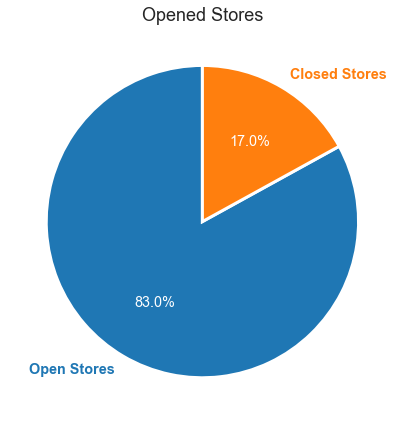

In [24]:
fig, ax = plt.subplots(figsize=(6, 6))

x, labels = is_open_df['Open'].value_counts(), ["Open Stores", "Closed Stores"]

pie_chart(ax,x,labels,'Opened Stores')



In [25]:
is_open_df.sample(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
769507,845,Wed,2014-12-24,3754,323,opened,0,0,1,d,a,7860.0,11.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
403232,443,Mon,2015-04-06,0,0,closed,0,1,1,d,a,11400.0,12.0,2005.0,0,NaN,NaN,NaN
384311,422,Thurs,2015-06-04,4614,465,opened,1,0,0,a,c,2880.0,NaN,NaN,0,NaN,NaN,NaN
895683,983,Wed,2015-05-13,7688,1152,opened,0,0,0,a,a,40.0,3.0,2014.0,1,1.0,2014.0,"Jan,Apr,Jul,Oct"
478951,526,Sat,2015-06-20,7169,1044,opened,0,0,0,a,a,120.0,NaN,NaN,1,48.0,2011.0,"Mar,Jun,Sept,Dec"
940884,1032,Sun,2014-06-15,0,0,closed,0,0,0,d,c,270.0,2.0,2013.0,1,40.0,2012.0,"Jan,Apr,Jul,Oct"
492924,541,Wed,2014-05-21,6303,803,opened,1,0,0,a,c,650.0,7.0,1990.0,0,NaN,NaN,NaN
634568,697,Fri,2014-10-24,10545,1021,opened,1,0,0,d,a,3780.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct"
471688,517,Sat,2013-02-23,3502,373,opened,0,0,0,a,c,22490.0,NaN,NaN,0,NaN,NaN,NaN
69688,77,Tue,2014-09-30,10810,795,opened,1,0,0,d,c,1090.0,8.0,2009.0,1,10.0,2014.0,"Jan,Apr,Jul,Oct"


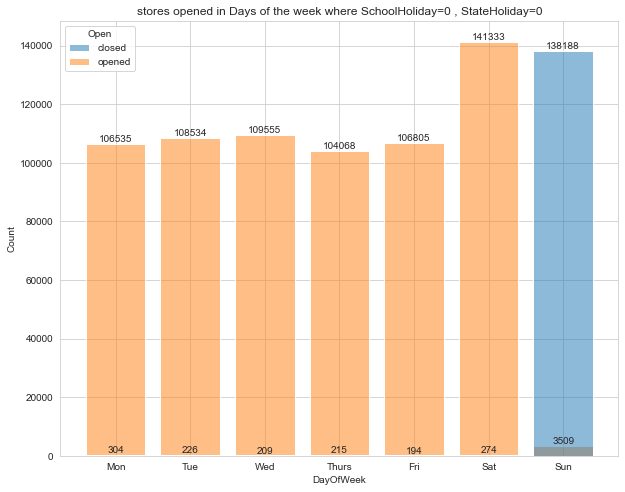

In [26]:
fig, (ax) = plt.subplots(1, 1, figsize=(10, 8))
ax.set_title("stores opened in Days of the week where SchoolHoliday=0 , StateHoliday=0")
data = is_open_df[(is_open_df.SchoolHoliday == 0) & (is_open_df.StateHoliday == 0)]
#multiple='stack',hue="Open"
sns.histplot(data=data, x="DayOfWeek", ax=ax, discrete=True, shrink=.8, hue="Open")
for container in ax.containers:
    ax.bar_label(container)

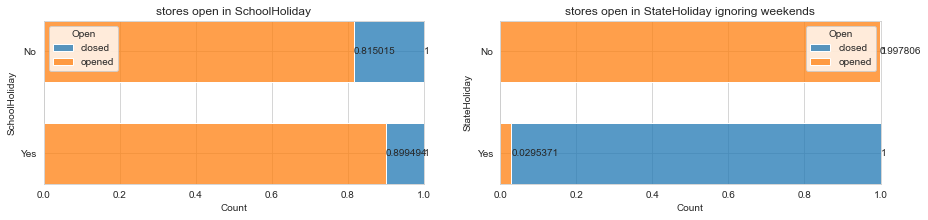

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))
ax1.set_title("stores open in SchoolHoliday")
data = is_open_df
data['SchoolHoliday']=data['SchoolHoliday'].map({0:"No",1:"Yes"})
data['StateHoliday']=data['StateHoliday'].map({0:"No",1:"Yes"})
sns.histplot(data=data, y="SchoolHoliday", hue="Open", ax=ax1,discrete=True, shrink=0.6, multiple="fill")
for container in ax1.containers:
    ax1.bar_label(container)


ax2.set_title("stores open in StateHoliday ignoring weekends")
data = is_open_df
data = data[data.DayOfWeek != 'Sun']
sns.histplot(data=data, y="StateHoliday", hue="Open", ax=ax2, discrete=True,shrink=0.6, multiple="fill")
for container in ax2.containers:
    ax2.bar_label(container)


<p style="font-size:25;font-weight:bold">Notice</p>

- most of the stores closed at sunday whether there is state holiday in this day or not
- some exceptional stores closes on a day that it's't either weekend or state-holiday
- most of the stores


<p style="font-size:25;font-weight:bold">Based on 1.2.1</p>

- we can't find a certain days in the year that the stores closes in it so we can hard code it that the sales = 0

### 1.2.2 Date,Weekday Field
- compare months sales in year 2013,2014,2015
- check if the sales depend on the time in the year (seasonality)
- check the avg sales in weekdays
- we have data for 12 months in 2013,2014, but only first 8 months in 2015
- split Date to day , month and drop year field

#### Date field

In [191]:
stores_sales_prep_df['year'] = stores_sales_prep_df.Date.dt.year
stores_sales_prep_df['month'] = stores_sales_prep_df.Date.dt.month
stores_sales_prep_df['day'] = stores_sales_prep_df.Date.dt.day



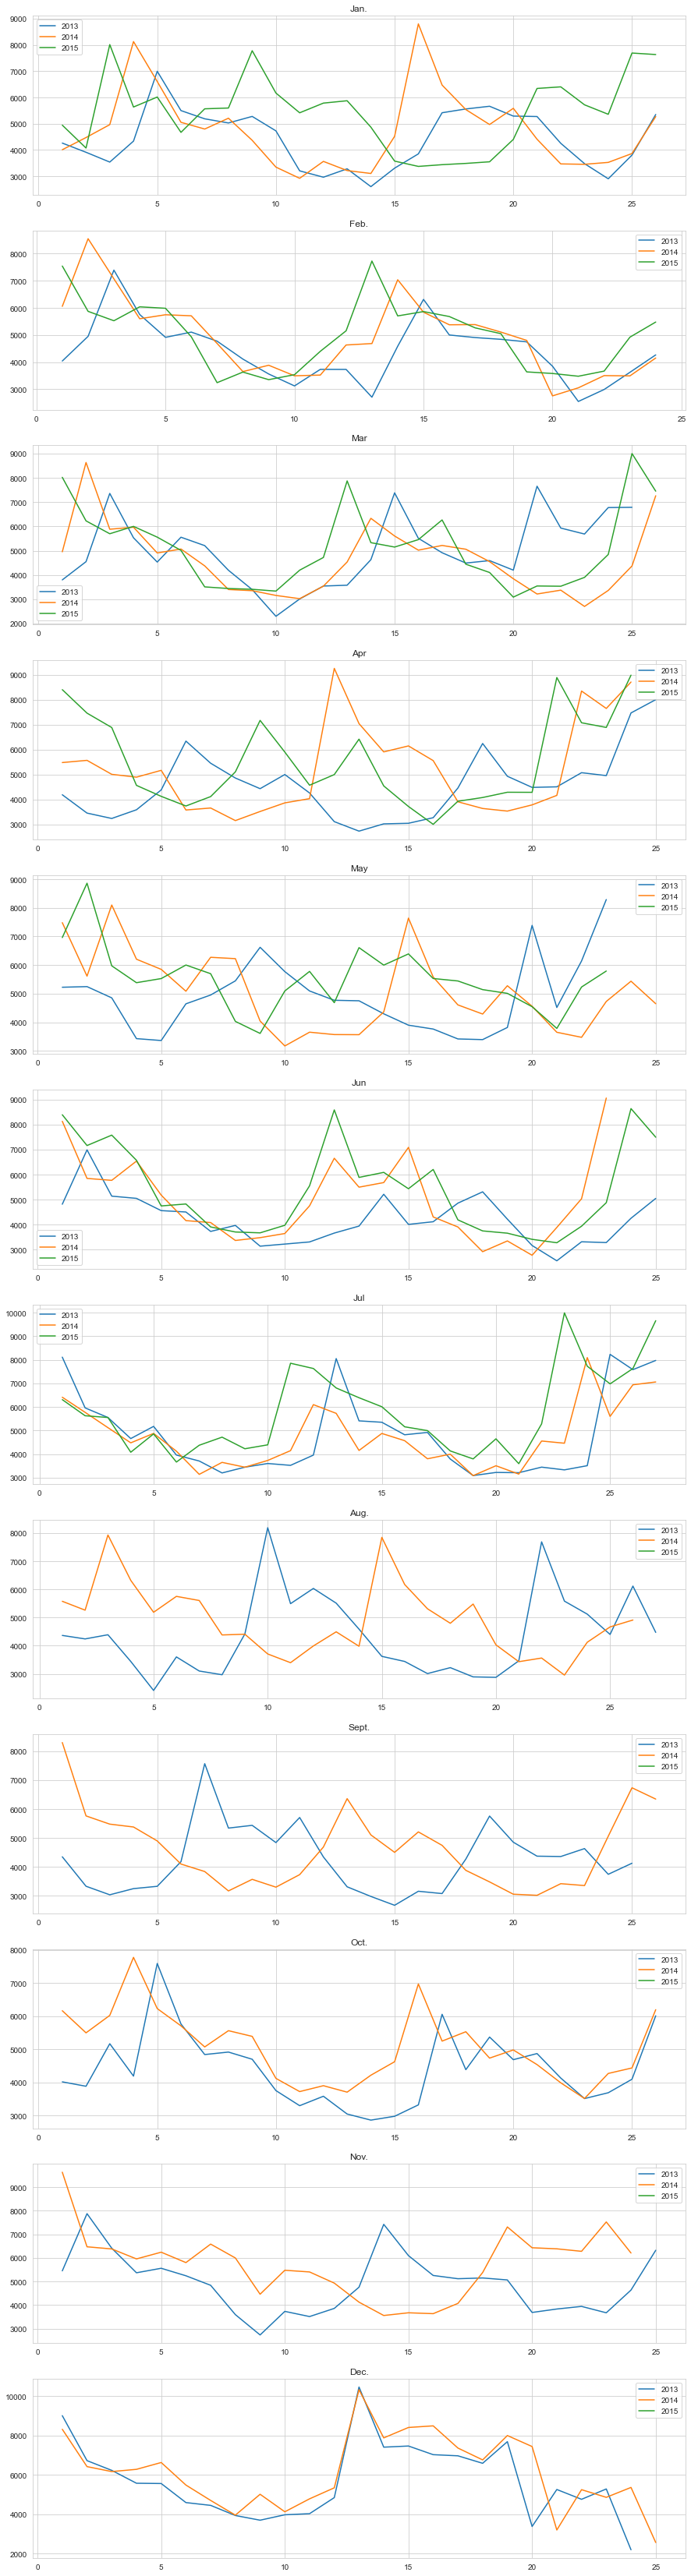

In [194]:
# month names for plotting titles
stores_sales_df = stores_sales_df.sort_values(by='Date')
months_name = "Jan.,Feb.,Mar,Apr,May,Jun,Jul,Aug.,Sept.,Oct.,Nov.,Dec.".split(',')

# select random store
rand_store_idx = random.randint(1, len(stores_df))

store_1_non_zero = stores_sales_df[(stores_sales_df['Store'] == rand_store_idx) & (stores_sales_df['Sales'] != 0)]

sales_2013 = store_1_non_zero[(store_1_non_zero['Date'].dt.year == 2013)]
sales_2014 = store_1_non_zero[(store_1_non_zero['Date'].dt.year == 2014)]
sales_2015 = store_1_non_zero[(store_1_non_zero['Date'].dt.year == 2015)]

years = [2013, 2014, 2015]
m_idx = 0
sales_years = [sales_2013, sales_2014, sales_2015]
rows, cols = 12, 1

fig, ax = plt.subplots(rows, cols, figsize=(15, 60))

for m in range(rows):
    ax[m].set_title(f"{months_name[m]}")
    for y in range(3):
        year_df = sales_years[y]
        month_df = year_df[year_df.Date.dt.month == m + 1]

        ax[m].plot(range(1, 1 + len(month_df)), month_df['Sales'], label=years[y])
        ax[m].legend()



<AxesSubplot:title={'center':'Sum of sales each month in 2013,2014 from Jan to Dec'}, xlabel='month', ylabel='Sales'>

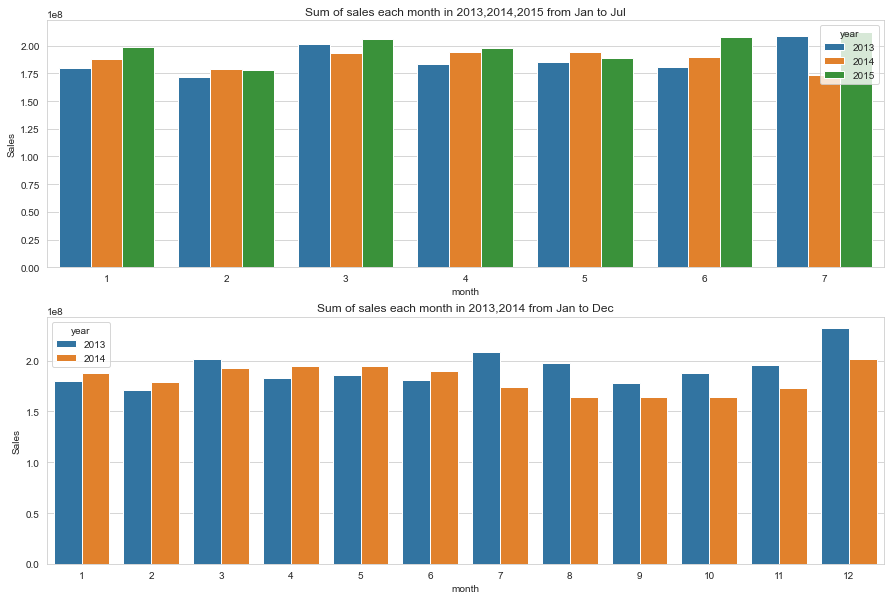

In [195]:
fig, axis = plt.subplots(2, 1, figsize=(15, 10))
axis[0].set_title("Sum of sales each month in 2013,2014,2015 from Jan to Jul")
first_7_months = stores_sales_prep_df[stores_sales_prep_df.month < 8]
data = first_7_months[['Sales', 'month', 'year']].groupby(by=['year', 'month'], as_index=False).sum()
sns.barplot(data, x='month', y='Sales', hue='year', ax=axis[0])

axis[1].set_title("Sum of sales each month in 2013,2014 from Jan to Dec")
data = stores_sales_prep_df[stores_sales_prep_df.year < 2015]
data = data[['Sales', 'month', 'year']].groupby(by=['year', 'month'], as_index=False).sum()
sns.barplot(data, x='month', y='Sales', hue='year', ax=axis[1])

<p style="font-size:20;font-weight:bold">Note</p>

- there is a seasonality in the sales data where the sales are nearly equal in each month in the year


#### WeekDay filed
- check the avg sales in weekdays

<AxesSubplot:title={'center':'avg of sales on weekdays in 2013,2014,2015'}, xlabel='DayOfWeek', ylabel='Sales'>

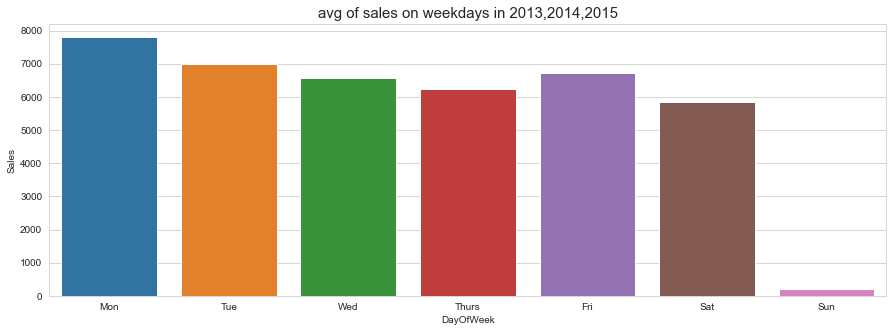

In [31]:

fig, axis = plt.subplots(figsize=(15, 5))
axis.set_title("avg of sales on weekdays in 2013,2014,2015", fontsize=15)
data = stores_sales_prep_df[['DayOfWeek', 'Sales']].groupby('DayOfWeek', as_index=False).mean()

# changing days from nums to Days for visualization
days = ['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
days = iter(days)
data['DayOfWeek'] = data['DayOfWeek'].map({i: next(days) for i in range(1, 8)})

sns.barplot(data, x='DayOfWeek', y='Sales', ax=axis)

from calendar import monthrange<p style="font-size:18">
select random 10 weeks and plot the sales for the 10 weeks days to find if there is a pattern in weekdays and sales
</p>



In [32]:
from calendar import monthrange


def get_random_week(data: pd.DataFrame, store_id) -> tuple[pd.DataFrame, tuple[int, int, int]]:
    """
    get random week in the year for certain store
    :param data: (pandas.DataFrame) store sales dataframe
    :param store_id: (int)
    :return: (pandas.DataFrame) random week rows ,tuple of ( select year, month and day)
    """
    store_data = data[data.Store == store_id]

    def get_valid_week_start():
        rand_year = random.choice([2013, 2014, 2015])
        rand_month = random.choice([i for i in range(1, 13)])
        month_days = monthrange(rand_year, rand_month)[1]
        all_monday_days =store_data[(store_data.year == rand_year) & (store_data.month == rand_month) & (store_data.DayOfWeek == 1)][
            'day']
        # select valid start where the end of the week in the same month
        valid_monday_days = [d for d in all_monday_days if d + 6 <= month_days]
        return valid_monday_days, rand_year, rand_month

    valid_monday_days, rand_year, rand_month = get_valid_week_start()
    while len(valid_monday_days) == 0:
        valid_monday_days, rand_year, rand_month = get_valid_week_start()

    # select random start
    rand_week_start = random.choice(valid_monday_days)
    rand_week_end = rand_week_start + 6

    result = store_data
    result = result[(result.year == rand_year) & (result.month == rand_month)]
    result = result[result.day.between(rand_week_start, rand_week_end)].sort_values(by="Date")

    is_normal_week = ((result.StateHoliday != '0') & (result.SchoolHoliday != 0)).sum() != 0
    if is_normal_week:
        return get_random_week(data, store_id)
    return result, (rand_year, rand_month, rand_week_start)


# test the function
data, _ = get_random_week(stores_sales_prep_df, 5)
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day
20074,5,1,2015-07-13,7425,719,1,1,0,1,2015,7,13
18959,5,2,2015-07-14,6144,607,1,1,0,1,2015,7,14
17844,5,3,2015-07-15,6323,716,1,1,0,1,2015,7,15
16729,5,4,2015-07-16,4963,571,1,1,0,1,2015,7,16
15614,5,5,2015-07-17,4355,513,1,1,0,1,2015,7,17
14499,5,6,2015-07-18,2108,241,1,0,0,0,2015,7,18
13384,5,7,2015-07-19,0,0,0,0,0,0,2015,7,19


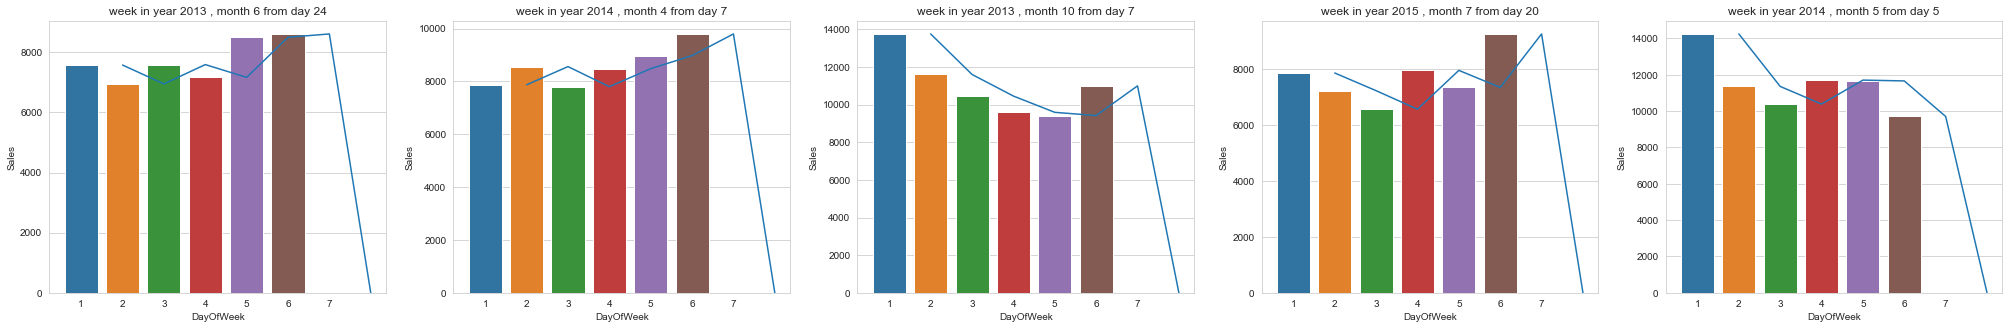

In [198]:
no_weeks = 5
rand_store_idx = random.randint(1, len(stores_df))
fig, axis = plt.subplots(1, no_weeks, figsize=(35, 5))

for i in range(no_weeks):
    data, (year, month, day) = get_random_week(stores_sales_prep_df, rand_store_idx)
    sns.barplot(data, x='DayOfWeek', y='Sales', ax=axis[i])
    sns.lineplot(data, x='DayOfWeek', y='Sales', ax=axis[i])
    axis[i].set_title(f'week in year {year} , month {month} from day {day}')

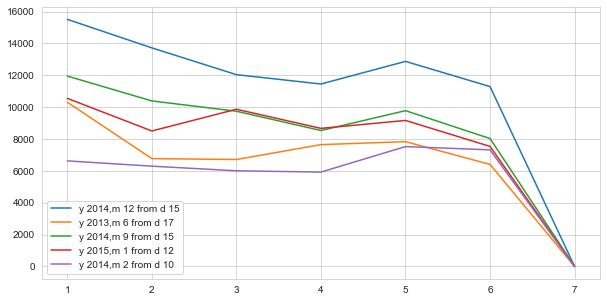

In [34]:
no_weeks = 5
rand_store_idx = random.randint(1, len(stores_df))
fig, axis = plt.subplots(figsize=(10, 5))

for i in range(no_weeks):
    data, (year, month, day) = get_random_week(stores_sales_prep_df, rand_store_idx)
    label = f'y {year},m {month} from d {day}'
    axis.plot(data.DayOfWeek, data.Sales, label=label)
axis.legend()

<p style="font-size:25;font-weight:bold">Based on 1.2.2</p>

- there is seasonality appears in year months , the sales are almost equal in the same month for three years 2013,2014,2015
- we must use the month col in the prediction
- most of the stores close on sunday
- pattern appears in WeekDays but with some offset from a year to another

### 1.2.3 SchoolHoliday StateHoliday field
- show the effect of the school holiday and stateHoliday on the sales compared to normal days for randomly selected store
- change letters of state_holidays to the holiday name for the col encoding
    - (a = public holiday, b = Easter holiday, c = Christmas, 0 = None)

In [85]:
rand_store_idx=random.randint(1,len(stores_df))

store_data=stores_sales_prep_df[(stores_sales_prep_df.Store==rand_store_idx)]
store_data["week"]=store_data['Date'].dt.isocalendar().week


C:\Users\Ahmed badr\AppData\Local\Temp\ipykernel_16092\281094768.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_data["week"]=store_data['Date'].dt.isocalendar().week


In [86]:
store_data.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,week
967958,924,4,2013-02-14,4921,519,1,0,0,0,2013,2,14,7


C:\Users\Ahmed badr\AppData\Local\Temp\ipykernel_16092\3026875052.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=store_data[stores_sales_prep_df.year==rand_year]


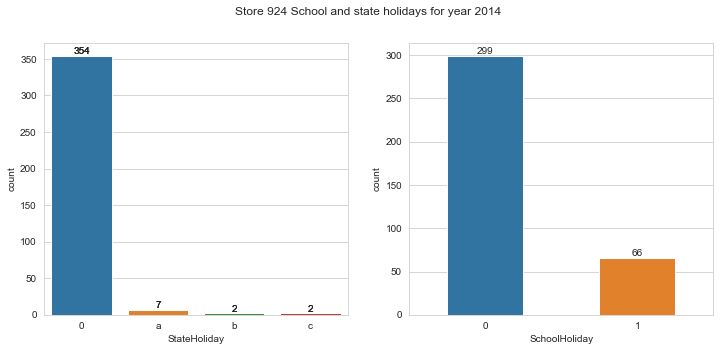

In [87]:

rand_year=random.choice([2013,2014])

data=store_data[stores_sales_prep_df.year==rand_year]

fig,axis=plt.subplots(1,2,figsize=(12,5))
fig.suptitle(f"Store {rand_store_idx} School and state holidays for year {rand_year}")

sns.countplot(data,x='StateHoliday',ax=axis[0])
for container in axis[0].containers:
    axis[0].bar_label(container)


sns.countplot(data,x='StateHoliday',ax=axis[0])
for container in axis[0].containers:
    axis[0].bar_label(container)

sns.countplot(data,x='SchoolHoliday',ax=axis[1],width=0.5)
for container in axis[1].containers:
    axis[1].bar_label(container)

<p style="font-size:25;font-weight:bold">Year Weeks Sales</p>


- calculate the sum of week sales , and add new column to determine if the week has a state holiday or not to compare between the weeks that have holidays from the weeks that don't

In [82]:

store_weeks_sales=store_data.copy()
# set for each day first if the day is any of the stateHolidays (a,b,c) anything other than 0 set it to one else set it to 0
store_weeks_sales['StateHoliday']=store_weeks_sales['StateHoliday'].apply(lambda x:1 if x!='0' else 0 )
store_weeks_sales=store_weeks_sales[['Sales','week','StateHoliday']].groupby('week').sum()
# if a week has one or more than holiday we will set it to holiday week
store_weeks_sales['holiday_week']=store_weeks_sales['StateHoliday'].apply(lambda x:1 if x>=1 else 0 )
store_weeks_sales.drop('StateHoliday',axis=1,inplace=True)

store_weeks_sales.sort_index(inplace=True)

In [83]:
store_weeks_sales.head(10)

,Sales,holiday_week
week,,
1,87721,1
2,131823,0
3,107657,0
4,110382,0
5,120642,0
6,138725,0
7,108186,0
8,133138,0
9,119139,0


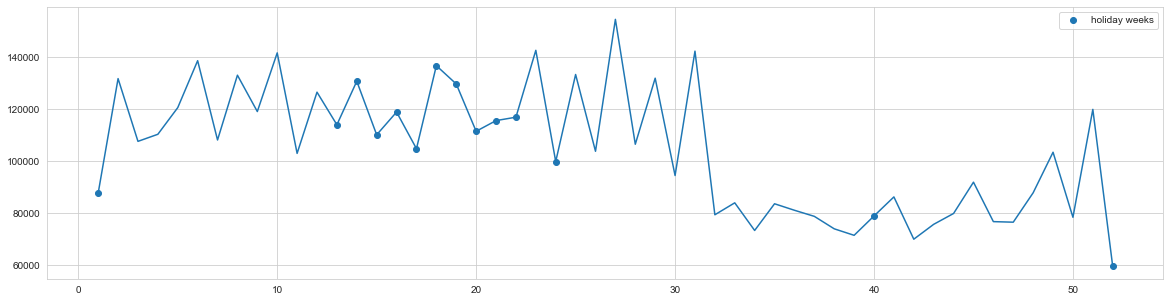

In [116]:
fig,(ax)=plt.subplots(figsize=(20,5))
holiday_weeks_idx=store_weeks_sales[store_weeks_sales.holiday_week==1]
# holiday_weeks_idx=[5,10,15,20]
ax.plot(store_weeks_sales.index,store_weeks_sales.Sales)
# sns.barplot(x=store_weeks_sales.index,y=store_weeks_sales['Sales'],ax=ax)
ax.scatter(holiday_weeks_idx.index,holiday_weeks_idx['Sales'],label="holiday weeks")
ax.legend()


<p style="font-size:25;font-weight:bold">Sales in Schoolholidays</p>

- avg sales in school holidays vs non school holidays for the years 2013,2014



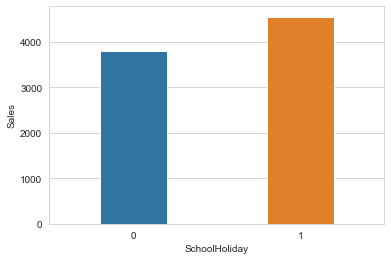

In [123]:
plt_data=store_data[['SchoolHoliday','Sales']].groupby('SchoolHoliday',as_index=False).mean()
sns.barplot(plt_data,x="SchoolHoliday",y='Sales',width=0.4)


- avg sales for SchoolHoliday is little higher than normal day

In [120]:
plt_data

,SchoolHoliday,Sales
0,0,3794.155440
1,1,4549.458824


### 1.2.4 Store type column
- find the percentage of each store type
- find the avg salary for each store
- then find the avg of store types a,b,c,d

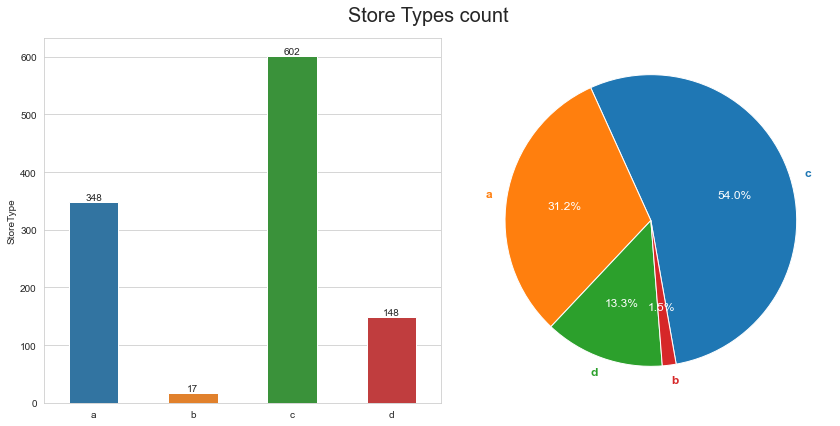

In [164]:
fig,axis=plt.subplots(1,2,figsize=(12,6))
fig.suptitle("Store Types count",fontsize=20)
chart_values=stores_df['StoreType'].value_counts()
chart_labels=stores_df['StoreType'].unique()

sns.barplot(x=chart_labels,y=chart_values,width=0.5,ax=axis[0])
for container in axis[0].containers:
    axis[0].bar_label(container)

pie_chart(axis[1],chart_values,chart_labels,"",space_width=1,startangle=-80)



<p style="font-size:25;font-weight:bold">Store types vs Sales</p>

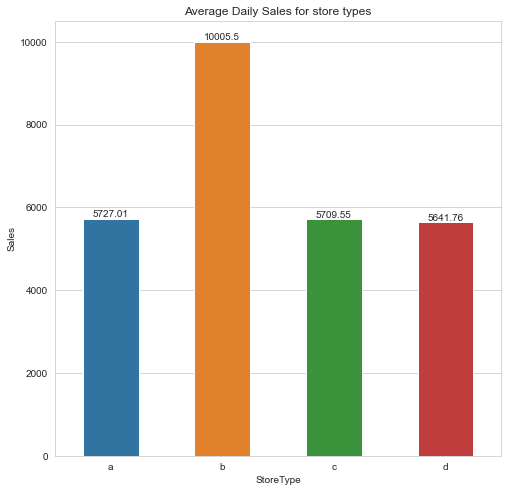

In [190]:
data=merged_stores_sales[['Store','Sales','StoreType','Date']]
store_sales_avg=data.groupby(by='Store').mean()
store_sales_avg=store_sales_avg.merge(stores_df[['Store','StoreType']],on='Store')

store_type_avg=store_sales_avg.groupby('StoreType', as_index=False).mean()
fig,ax=plt.subplots(figsize=(8,8))

sns.barplot(store_type_avg,x="StoreType",y="Sales",width=0.5,ax=ax)

ax.set_title("Average Daily Sales for store types")
for container in ax.containers:
    ax.bar_label(container)

### 1.2.5 Assortment
- Assortment - describes an assortment level: a = basic, b = extra, c = extended
    - An assortment strategy is a retail industry sales tool that optimizes the variety of goods offered for sale to consumers

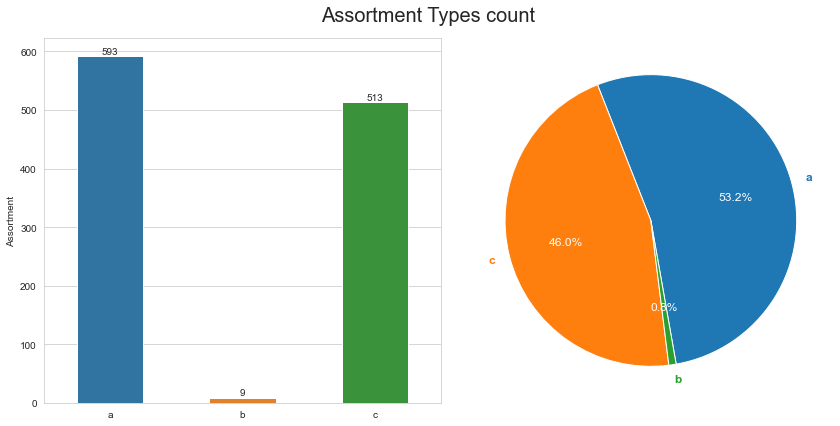

In [185]:
fig, axis = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Assortment Types count", fontsize=20)
chart_values = stores_df['Assortment'].value_counts()
chart_labels = stores_df['Assortment'].unique()

sns.barplot(x=chart_labels, y=chart_values, width=0.5, ax=axis[0])
for container in axis[0].containers:
    axis[0].bar_label(container)

pie_chart(axis[1], chart_values, chart_labels, "", space_width=1, startangle=-80)


<p style="font-size:25;font-weight:bold">Assortment vs Sales</p>

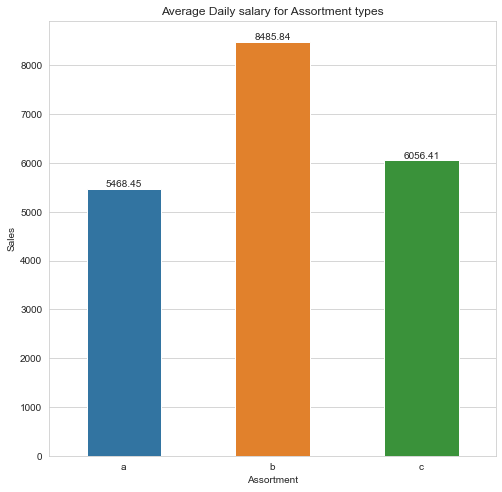

In [186]:
data=merged_stores_sales[['Store','Sales','Assortment','Date']]
store_sales_avg=data.groupby(by='Store').mean()
store_sales_avg=store_sales_avg.merge(stores_df[['Store','Assortment']],on='Store')

store_type_avg=store_sales_avg.groupby('Assortment', as_index=False).mean()
fig,ax=plt.subplots(figsize=(8,8))

sns.barplot(store_type_avg,x="Assortment",y="Sales",width=0.5,ax=ax)

ax.set_title("Average Daily salary for Assortment types")
for container in ax.containers:
    ax.bar_label(container)

### 1.2.6 Competetion D